# Comments on this document
This is the main file for the data handling and manipulation. All tasks are carried out in external functions in separate .py files to keep the notebook clean.

In [2]:
# import the required packages. Add more if necessary
import pandas as pd # data processing
import numpy as np # data processing
import matplotlib.pyplot as plt # create plots
import plotly.graph_objects as go # create interactive plots
import pickle
import os # interaction with operating system

import Data_Import
import Data_Cleaning
import Data_Analysis
import Data_Visualization
#import WatBalMod
import Helper

In [3]:
## You don't need to change this cell. Always reloads modules (external functions) when cell is executed so that the newest version is used
%load_ext autoreload
%autoreload 2

In [4]:
# Adjust this cell with your preferences
# Settings of plots
figSize = [10, 6] # size of figures
fontSize = 16 # Size of numbers and text in plots
lineWidth = 1.5 # linewidth in plots

# adapts the plot settings for all future plots
plt.rcParams['figure.figsize'] = figSize
plt.rcParams['font.size'] = fontSize
plt.rcParams['lines.linewidth'] = lineWidth

path_to_data_folder = 'Data' # Provide the path to the folder containing the data
latest_data_directory = os.path.join('spring_data', 'wabesense_discharge_2023-09-01')
new_spring_data_available = False
new_meteo_data_available = False

path_to_plot_folder = 'Plots' # Enter a name for the folder where the plots will be saved
plotFileType = 'pdf' # 'pdf' or 'png'; filetype for the plots

if not os.path.isdir(path_to_plot_folder): # creates the folder if it does not exist yet
    os.makedirs(path_to_plot_folder)

# read and visualize spring data

In [8]:
# returns multiple lists
spring_names, spring_description, spring_data_paths, spring_data_dfs = Data_Import.import_spring_data(
    os.path.join(path_to_data_folder, latest_data_directory))

In [9]:
# clean the data: keep only valid data range
valid_spring_data_dfs = {}
for name, df in spring_data_dfs.items():
    df = Data_Cleaning.keep_only_valid_data(df)
    valid_spring_data_dfs[name] = df

In [9]:
# create and save dataframes with different time resolutions for all springs if new data available
# else import the already resampled data
save_path = os.path.join(path_to_data_folder, 'spring_data', 'resampled_data')
resolutions = ['H', 'D', 'W', 'M']  # Hourly, Daily, Weekly, Monthly
if new_spring_data_available:
    resampled_spring_data_dfs = {}
    for name, df in valid_spring_data_dfs.items():
            resampled_spring_data_dfs[name] = Data_Cleaning.resample_and_save_spring_data(df, resolutions, save_path, spring_name=name, new_data_available=new_spring_data_available)
else:
    resampled_spring_data_dfs = Data_Import.import_resampled_data(save_path)

In [10]:
# save the resampled data as pickle so that it can be used for future developments
with open(os.path.join(save_path, "resampled_spring_data_dfs.pkl"), "wb") as f:
    pickle.dump(resampled_spring_data_dfs, f)

In [9]:
#make it possible to access the avlid_spring_data_dfs with indexes:
valid_spring_data_dfs = list(valid_spring_data_dfs.values())

In [695]:
#print(spring_description[0])
# Create a list of values from the dictionary
#values_list = list(valid_spring_data_dfs.values())
#values_list[0]

In [90]:
for i in range(0, len(valid_spring_data_dfs)):
     # takes a lot of time
    
    fig_single_spring = Data_Visualization.plot_single_spring(spring_names[i], valid_spring_data_dfs[i], spring_description[i], path_to_plot_folder)

In [46]:
# Example usage just to get one single plot and to adjust what is needed:

saved_figure_path = Data_Visualization.plot_single_spring(spring_names[0], valid_spring_data_dfs[0], spring_description[0], path_to_plot_folder)

if saved_figure_path:
    print(f"Figure saved at: {saved_figure_path}")
else:
    print("Figure could not be saved due to an error.")
    
    

Figure saved at: Plots/Bonaduz.BS.Paliu_Fravi.pdf


In [153]:
#Read an visualize the snow data to chose the date use the format '2020-01-01'
schnee_flims = Data_Import.import_snow_data("5PL0_schnee_flims.csv",'2020-10-01','2023-05-02')
schnee_thusis = Data_Import.import_snow_data("5TH0_thusis_schnee.csv",'1990-10-01','2023-05-02')

#Data_Visualization.plot_snow(schnee_flims,schnee_thusis,"schnee_thusis_flims")
Data_Visualization.plot_snow_one(schnee_flims,"schnee")
#Data_Visualization.plot_snow(schnee_flims,2020,2023)


Error plotting Bonaduz.BS.Paliu_Fravi: 'datetime'


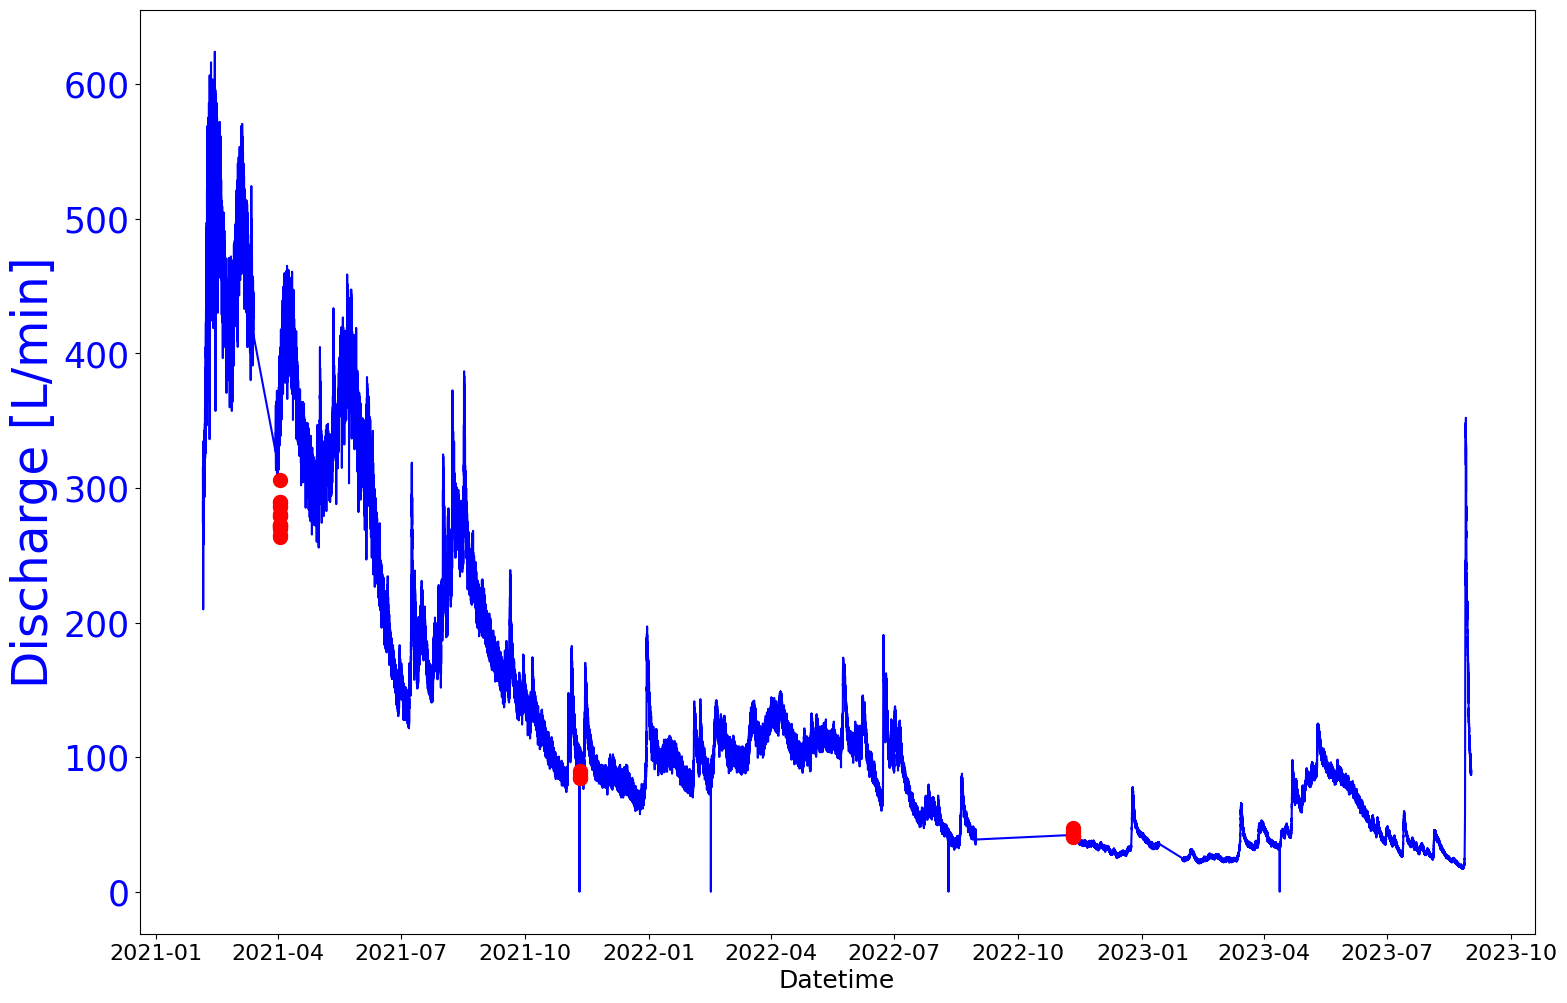

In [70]:
# Read an visualize the measurment campaign data together with the spring data
mc_u,mc_pf = Data_Import.import_mc_data("sites_ref_manual_measurements.xlsx")
path = "/Users/ramunbar/Documents/Master/3_Semester/GITHUB/ETH_MP_Alpine_Water_Springs_Modelling/Plots/spring_plots/MC_comparison"

# Convert the "datetime" column to datetime with "Europe/Zurich" time zone
mc_pf['datetime'] = pd.to_datetime(mc_pf['datetime']).dt.tz_localize('Europe/Zurich')
mc_u['datetime'] = pd.to_datetime(mc_u['datetime']).dt.tz_localize('Europe/Zurich')
#chose mc_pf and numbers [0] to find the spring of interest
Data_Visualization.plot_spring_data_and_mc(spring_names[0], valid_spring_data_dfs[0], spring_description[0], path,mc_pf)


# read and visualize the meteo data

In [5]:
meteo_folders = ['Freienbach', 'Oberriet_Kriessern', 'Oberriet_Moos', 'Reichenau', 'Chur', 'Rothenbrunnen', 'Thusis']
meteo_data_dfs = {}
for folder in meteo_folders:
    folder_path = os.path.join(path_to_data_folder, 'meteo_data', 'raw_data', folder)
    data_file = Data_Import.find_file_with_pattern(folder_path)
    data_frames = Data_Import.read_multi_dataset_txt_file(data_file, delimiter=';')
    meteo_data_dfs[folder] = data_frames

In [6]:
# add the timezone to the meteo data
for station, df_list in meteo_data_dfs.items():
    for df in df_list:
        Data_Cleaning.add_timezone_to_dataframe(df, 'UTC')

In [9]:
# only precipitation
# create and save dataframes with different time resolutions for all Meteostations if new data available
# else import the already resampled data
save_path = os.path.join(path_to_data_folder, 'meteo_data', 'resampled_precip_data')
resolutions = ['D', 'W', 'M']  # Daily, Weekly, Monthly
if new_meteo_data_available:
    resampled_precip_data_dfs = {} # Dictionary to store the resampled dataframes
    for station in ['Freienbach', 'Oberriet_Moos', 'Oberriet_Kriessern', 'Chur', 'Rothenbrunnen', 'Thusis']:
        resampled_precip_data_dfs[station] = Data_Cleaning.resample_and_save_precip_data(meteo_data_dfs[station], resolutions, save_path, station, new_meteo_data_available)
else:
    resampled_precip_data_dfs = Data_Import.import_resampled_data(save_path)

In [10]:
# save the resampled data as pickle so that it can be used for future developments
with open(os.path.join(save_path, "resampled_precip_data_dfs.pkl"), "wb") as f:
    pickle.dump(resampled_precip_data_dfs, f)

In [12]:
# only temperature
# create and save dataframes with different time resolutions for all Meteostations if new data available
# else import the already resampled data
save_path = os.path.join(path_to_data_folder, 'meteo_data', 'resampled_temp_data')
resolutions = ['H', 'D', 'W', 'M']  # Hourly, Daily, Weekly, Monthly
if new_meteo_data_available:
    resampled_temp_data_dfs = {} # Dictionary to store the resampled dataframes
    for station in ['Freienbach', 'Oberriet_Moos','Oberriet_Kriessern', 'Chur', 'Thusis']:
        resampled_temp_data_dfs[station] = Data_Cleaning.resample_and_save_temp_data(meteo_data_dfs[station], resolutions, save_path, station, new_meteo_data_available)
    with open(os.path.join(save_path, "resampled_temp_data_dfs.pkl"), "wb") as f:
        pickle.dump(resampled_temp_data_dfs, f)
else:
    resampled_temp_data_dfs = Data_Import.import_resampled_data(save_path)
# save the resampled data as pickle so that it can be used for future developments


Directory 'Data/meteo_data/resampled_temp_data/Oberriet_Kriessern' created.


In [13]:
# save the resampled data as pickle so that it can be used for future developments
with open(os.path.join(save_path, "resampled_temp_data_dfs.pkl"), "wb") as f:
    pickle.dump(resampled_temp_data_dfs, f)

In [34]:
for station, df_list in meteo_data_dfs.items():
    pass # takes a lot of time to run
    #Data_Visualization.plot_meteo_precipitation(df_list[1], station, path_to_plot_folder)

# plot spring and meteo data together
## spring discharge and precipitation
### Ulrika

In [318]:
# creates an interactive plot of spring discharge and precipitation
spring_name = 'Paliu_Fravi'
meteo_name = 'Chur'
resolution = ('10min', 'D') # temporal resolution of spring and precipitation: '10min' 'H', 'D', 'M'  # 10min not for all meteo st.
mc_data = mc_pf #chose mc_u for ulrika and mc_pf for paliu fravi
start = None # '2022-01-25'
end = None # '2022-02-25'
Data_Visualization.plot_spring_precipitation_interactive(spring_name, meteo_name, resampled_spring_data_dfs, resampled_precip_data_dfs, resolution, start=start, end=end)
#show data with measurments 

Data_Visualization.plot_spring_precipitation_mc_interactive(mc_data, spring_name, meteo_name, resampled_spring_data_dfs, resampled_precip_data_dfs, resolution, start=start, end=end)

NameError: name 'mc_pf' is not defined

In [204]:
# exports a plot as pdf
spring_name = 'Ulrika'
meteo_names = ['Oberriet_Moos']
resolution = ('10min', 'D') # temporal resolution of spring and precipitation: '10min' 'H', 'D', 'M'  # 10min not for all meteo st.
start = None # '2022-01-25'
end = None #'2022-02-25'
save_path = os.path.join(path_to_plot_folder, 'Discharge_and_Precipitation_timeseries')
name_extension = '' # added to the pdf name at the end
Data_Visualization.plot_spring_precipitation_static(spring_name, meteo_names, resampled_spring_data_dfs, resampled_precip_data_dfs, save_path, name_extension, resolution, start=start, end=end)

Directory 'Plots/Discharge_and_Precipitation_timeseries/Ulrika' created.


### Paliu Fravi

In [83]:
# creates an interactive plot of spring discharge and precipitation
spring_name = 'Paliu_Fravi'
meteo_name = 'Chur'
resolution = ('H', 'D') # temporal resolution of spring and precipitation: '10min' 'H', 'D', 'M'  # 10min not for all meteo st.
start = None # '2022-01-25'
end = None # '2022-02-25'
Data_Visualization.plot_spring_precipitation_interactive(spring_name, meteo_name, resampled_spring_data_dfs, resampled_precip_data_dfs, resolution, start=start, end=end)

In [319]:
# exports a plot as pdf
spring_name = 'Paliu_Fravi'
meteo_names = ['Chur', 'Rothenbrunnen', 'Thusis']
resolution = ('10min', 'D') # temporal resolution of spring and precipitation: '10min' 'H', 'D', 'M'  # 10min not for all meteo st.
start = None #'2022-01-25'
end = None #'2022-02-25'
save_path = os.path.join(path_to_plot_folder, 'Discharge_and_Precipitation_timeseries')
name_extension = '' # added to the pdf name at the end
Data_Visualization.plot_spring_precipitation_static(spring_name, meteo_names, resampled_spring_data_dfs, resampled_precip_data_dfs, save_path, name_extension, resolution, start=start, end=end)

UnboundLocalError: local variable 'mc_data' referenced before assignment

## spring temperature and air temperature
### Ulrika

In [320]:
# creates an interactive plot of spring temperature and air temperature
spring_name = 'Ulrika'
meteo_names = ['Freienbach', 'Oberriet_Moos']
resolution = ('D', 'W') # temporal resolution of spring and precipitation: '10min' 'H', 'D', 'M'  # 10min not for all meteo st.
start = None # '2022-01-25'
end = None # '2022-02-25'
Data_Visualization.plot_spring_temperature_interactive(spring_name, meteo_names, resampled_spring_data_dfs, resampled_temp_data_dfs, resolution, start=start, end=end)

In [205]:
# exports a plot as pdf
spring_name = 'Ulrika'
meteo_names = ['Freienbach', 'Oberriet_Moos']
resolution = ('D', 'D') # temporal resolution of spring and precipitation: 'H', 'D', 'M'  # 10min not for all meteo st.
start = None #'2022-01-25'
end = None #'2022-02-25'
save_path = os.path.join(path_to_plot_folder, 'Temperature_timeseries')
name_extension = '' # added to the pdf name at the end
Data_Visualization.plot_spring_temperature_static(spring_name, meteo_names, resampled_spring_data_dfs, resampled_temp_data_dfs, save_path, name_extension, resolution, start=start, end=end)

Directory 'Plots/Temperature_timeseries/Ulrika' created.


### Paliu Fravi

In [206]:
# creates an interactive plot of spring temperature and air temperature
spring_name = 'Paliu_Fravi'
meteo_names = ['Chur', 'Thusis']
resolution = ('D', 'D') # temporal resolution of spring and precipitation: 'H', 'D', 'M'  # 10min not for all meteo st.
start = None # '2022-01-25'
end = None # '2022-02-25'
Data_Visualization.plot_spring_temperature_interactive(spring_name, meteo_names, resampled_spring_data_dfs, resampled_temp_data_dfs, resolution, start=start, end=end)

In [207]:
# exports a plot as pdf
spring_name = 'Paliu_Fravi'
meteo_names = ['Chur', 'Thusis']
resolution = ('D', 'D') # temporal resolution of spring and precipitation: 'H', 'D', 'M'  # 10min not for all meteo st.
start = None #'2022-01-25'
end = None #'2022-02-25'
save_path = os.path.join(path_to_plot_folder, 'Temperature_timeseries')
name_extension = '' # added to the pdf name at the end
Data_Visualization.plot_spring_temperature_static(spring_name, meteo_names, resampled_spring_data_dfs, resampled_temp_data_dfs, save_path, name_extension, resolution, start=start, end=end)

Directory 'Plots/Temperature_timeseries/Paliu_Fravi' created.


# Correlation of Meteo and Spring data
## Correlation of precipitation and discharge

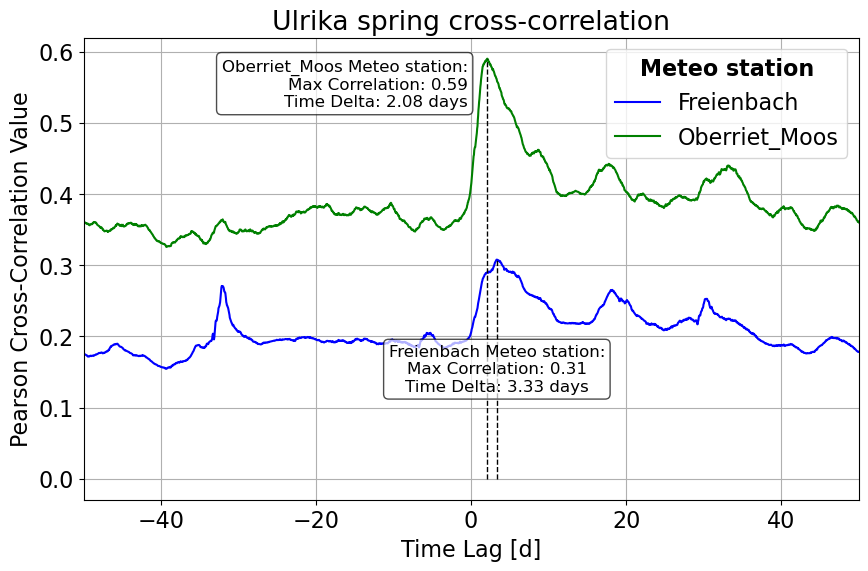

In [126]:
spring_precip_corr_dfs = {}
# Ulrika
spring_name = 'Ulrika'
meteo_names = ['Freienbach', 'Oberriet_Moos']

spring_precip_corr_dfs[spring_name] = Data_Analysis.cross_correlation_time_series_multiple(spring_name, meteo_names, resampled_spring_data_dfs, resampled_precip_data_dfs, path_to_plot_folder, data_type='precipitation', resolution='H', range_of_days=50)

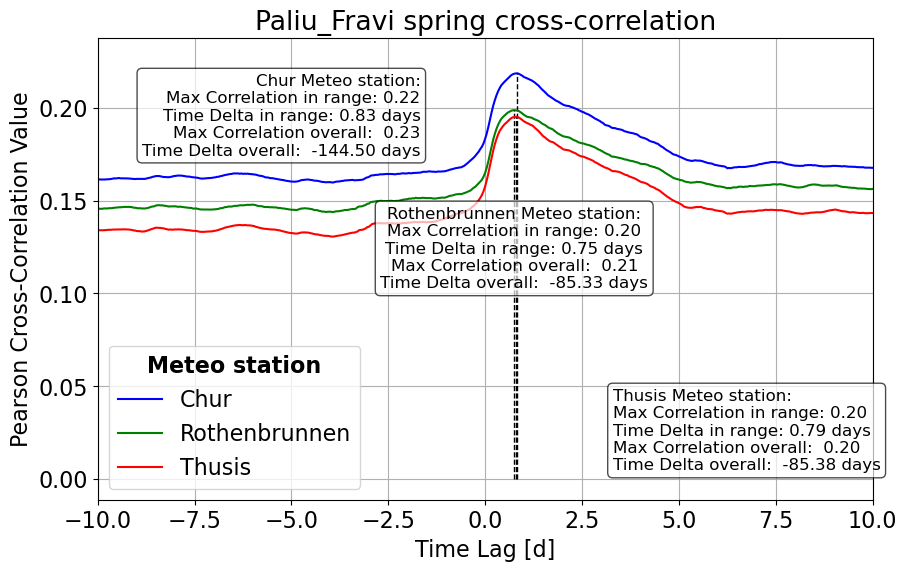

In [125]:
# Paliu_Fravi
spring_name = 'Paliu_Fravi'
meteo_names = ['Chur', 'Rothenbrunnen', 'Thusis']

spring_precip_corr_dfs[spring_name] = Data_Analysis.cross_correlation_time_series_multiple(spring_name, meteo_names, resampled_spring_data_dfs, resampled_precip_data_dfs, path_to_plot_folder, data_type='precipitation', resolution='H', range_of_days=10)

## Correlation of air temperature and spring water temperature

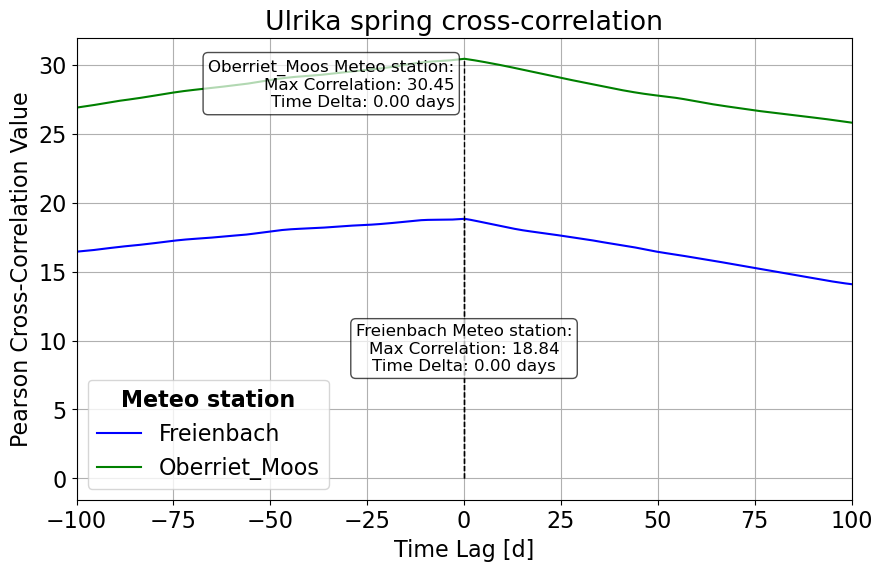

In [213]:
spring_air_temp_corr_dfs = {}
# Ulrika
spring_name = 'Ulrika'
meteo_names = ['Freienbach', 'Oberriet_Moos']

spring_air_temp_corr_dfs[spring_name] = Data_Analysis.cross_correlation_time_series_multiple(spring_name, meteo_names, resampled_spring_data_dfs, resampled_temp_data_dfs, path_to_plot_folder, data_type='temperature' , resolution='H', range_of_days=100)

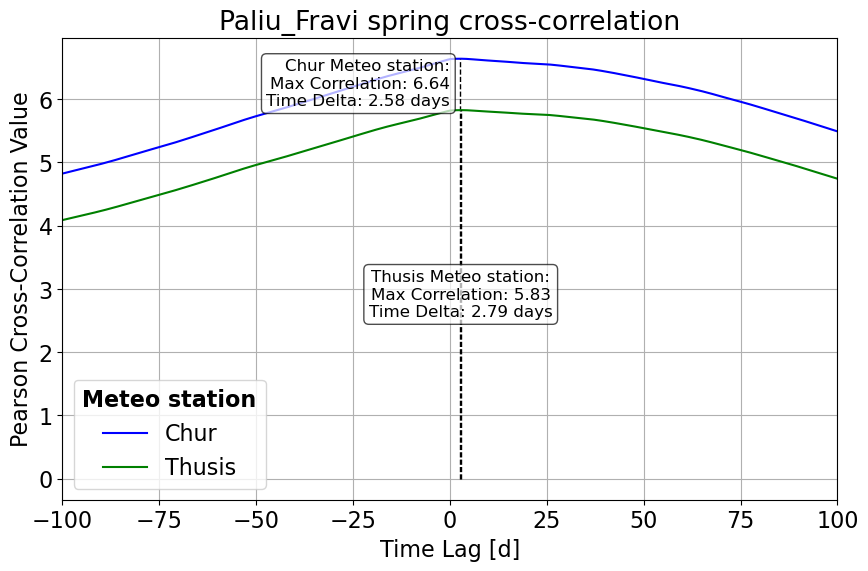

In [214]:
# Paliu_Fravi
spring_name = 'Paliu_Fravi'
meteo_names = ['Chur', 'Thusis']

spring_air_temp_corr_dfs[spring_name] = Data_Analysis.cross_correlation_time_series_multiple(spring_name, meteo_names, resampled_spring_data_dfs, resampled_temp_data_dfs, path_to_plot_folder, data_type='temperature', resolution='H', range_of_days=100)

# Find peaks in spring data

In [371]:
# calculate the peak value and peak width for every spring
spring_peaks_dfs = {}
for name, df_dict in resampled_spring_data_dfs.items():
    spring_peaks_dfs[name] = Data_Analysis.find_spring_peaks(name, df_dict['10min'], path_to_plot_folder, window_length=101, polyorder=3, prominence_threshold=10, distance=24*60//10, show_plot=False, save_plot=True)

In [ ]:
# to look at one spring in detail
print(resampled_spring_data_dfs.keys())

In [378]:
# calculate the peak data for a single spring to improve the function find_spring_peaks()
name = 'Paliu_Fravi'
df_dict = resampled_spring_data_dfs[name]
spring_peaks = Data_Analysis.find_spring_peaks(name, df_dict['10min'], path_to_plot_folder, window_length=101, polyorder=3, prominence_threshold=10, distance=24*60//10, show_plot=False, save_plot=True)

In [200]:
# calculate the statistics for the peak width for every spring
peak_statistics = Data_Analysis.spring_peaks_statistics(resampled_spring_data_dfs, spring_peaks_dfs)

In [201]:
# save the statistics to an excel file
excel_path = os.path.join(path_to_data_folder, 'spring_data', 'peak_statistics')
Helper.create_directory(excel_path)
peak_statistics.to_excel(os.path.join(excel_path, 'peak_statistics.xlsx'), index=True)

In [203]:
print(peak_statistics)

                 data_duration(days) peak_count(-) mean_width(hours)  \
Paliu_Fravi                      837            59         22.267638   
Salums_Friedrich                 179             5        134.369529   
Salums_Leo                       106             0                 0   
Leo_Friedrich                    663           165          6.555562   
Acqua_d'Balz_1                   337            16          7.514853   
Acqua_d'Balz_2                   337             9         10.061787   
Rossmoos                         202            23         16.050637   
Muesli                           550            17         62.789078   
Ulrika                           928            68          29.63831   
Chalta_Wasser                    500            13        104.413751   
Grapp_rechts                     474            29         34.026035   
Prada_bella_suot                 163             2         34.241375   
Prada_bella_sura                 163             1        207.02

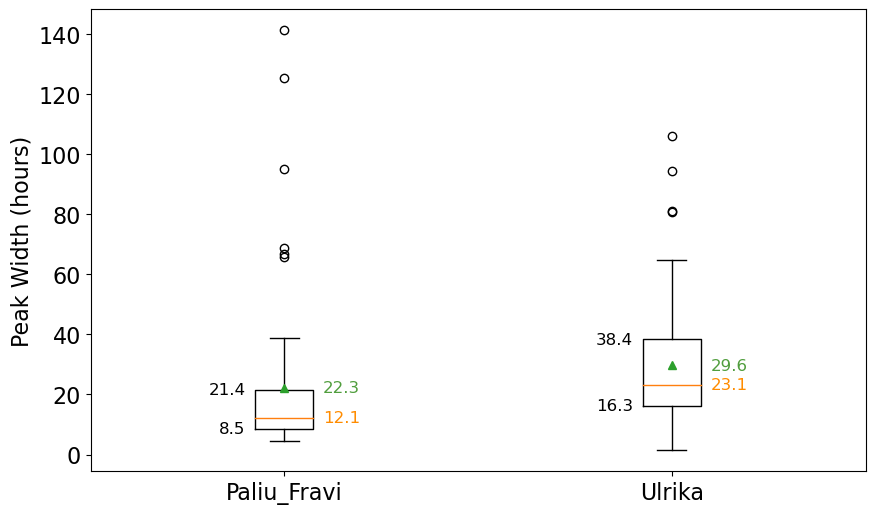

In [370]:
# create a figure with boxplots of all peaks from all springs
save_path = os.path.join(path_to_plot_folder, 'spring_plots', 'peak_detection')
Data_Visualization.plot_peak_width_boxplots(spring_peaks_dfs, save_path)

# Water Balance Model

In [385]:
wb_df, gof_values = WatBalMod.WatBal_main.run_WatBal_model('Ulrika', 'Freienbach', path_to_data_folder)

Ulrika_D.csv has been found in directory Data/spring_data/resampled_data/Ulrika
Freienbach_temp_H.csv has been found in directory Data/meteo_data/resampled_temp_data/Freienbach
Freienbach_precip_H.csv has been found in directory Data/meteo_data/resampled_precip_data/Freienbach


In [386]:
gof_values

{'NSE': -7.37209351259785,
 'KGE': nan,
 'Bias': 526.6551848437476,
 'PBias': -141.62327100042046,
 'MAE': 620.9896912775752,
 'RMSE': 835.1417151370295,
 'MAD': 4276.188128169905,
 'MPD': 2783.120767058794}

In [388]:
print(wb_df.columns.tolist())


['doy', 'discharge_meas(mm)', 'min_temperature(C)', 'max_temperature(C)', 'mean_temperature(C)', 'precipitation(mm)', 'rain_fall(mm)', 'snow_fall(mm)', 'pET(mm)', 'aET(mm)', 'snow_melt(mm)', 'snow_cover(mm)', 'storage_soil(mm)', 'storage_gw(mm)', 'runoff(mm)', 'percolation_gw(mm)', 'discharge_sim(mm)']
